# Sediment Size Analysis by Sieve (SedSAS) Class  Usage Guide  

### Using the SedSAS class with single user data sample input entered directly into the script

## Part I: Introduction:

SedSAS is a class object written in the Python programming (scripting) language. Its purpose is to provide a basic set of statistical and visualization tools for analyzing unconsolidated sediment size-fraction samples collected in the field and separated using either mechanical sieves or any other analog partition-by-size methods. 

#### Single-Sample Processing:

In this notebook we look at how the class is used to computer grain-size statistics for a single sample, where the user elects to simply enter the sieve apertures and subsample weights by hand directly into this notebook or their script. 

You can use this notebook not only as a learning tool or reference but also as a template from which to directly conduct your own analyses. To do the latter, simply download a copy and replace the existing example data sieve apertures and subsample weights with your own and run. 

The downloaded notebook can be further modified, or copied and then the copy modified, as you see fit. 

#### What we'll do...

1.) Load data from a supplied Python list object into a Pandas dataframe <br/>
2.) Rework the contents of the new Pandas dataframe so as to meet the input and format requirements of SedSAS <br/>
3.) Compute grain-size statistics by calling statistics computation methods individually<br/>
4.) Write the results to a new Pandas dataframe and display the contents in the notebook <br/>
5.) Find the modes and list these in the notebook
6.) Recompute grain-size statistics this time using the convenience method ComputeGSStats.
    ComputeGSStats() computes all the available statistics, including the first three modes (if they all exist) in a single method call <br/>
7.) Retrieve and print to the notebook the weights table (the original dataframe plus the additional content added automatically by SedSAS) and the Folk and Ward Inclusive Graphics quantiles list. <br/>
8.) Create histogram and cumulative density function plots for the sample. <br/>
9.) Save the contents of the new results dataframe to a new csv file <br/>

### Preliminaries:
- The SedSAS class, this notebook, and all supporting materials were developed in a Python 3.x environment. Neither the class nor any of these supporting materials have been tested using a Python 2.x distro. *Backward compatibility is expected, but not assured.*
    
- If you do not have a Python interpreter installed on your computer (from the factory Linux UNIX, and MacOS users do; Windows users likely do not), your best bet for a trouble-free installation experience can be had here: https://anaconda.org/anaconda/python. If you're more adventurous, try the Python Software Foundation: https://www.python.org/getit/. Even if your OS does come with a Python interpreter already in place (UNIX, Linux, MacOS), it's probably a good idea to get a more up to date release (most OS installs are a version, or more, behind the current release). Again, I suggest the Anaconda distribution. Be sure to get a copy of Python version 3.5 or later.  
- Required external Python Libraries and modules\*\*:
    - sys (basic Python methods for retrieving information from the host operating system)
    - numpy (numeric Python library for array and matrix operations)
    - pandas (Python Data Analysis library for in-memory data storage and analysis)
    - matlotlib (Matrix Plotting Library for plot generation) 
    
    
- Loading SedSAS.py into your script: to use the class it must first be loaded into your script or notebook environment. If the class script file is located in the same directory as your analysis script then to load it you need only do the following:
    
    import  sedSAS
    
If the SedSAS.py file is located elsewhere on your computer or server you'll have to point Python to its location by amending the local path variable\*\*\*:

    import sys
    sys.path.append(/full/path/to/directory/where/class/file/is/located/)
    
For example, if your copy of SedSAS.py is located in the directory: 

    /Users/Documents/projects/ 
    
enter this into the sys.path.append method as:

    import sys
    sys.path.append(/Users/Documents/projects/)


______________
\*\*Note that these, and many, many other libraries, are included in the default Anaconda Python distribution.

\*\*\* Note that you are not changing your operating system's global PATH variable, only a copy of it that is assigned to the environment tied to your script or notebook. The global PATH variable is not altered

#### Required User Inputs:
Initial data input to SedSAS during the instantiation process consists of:

1. a listing of all the sieve apertures (in $\phi$ units) used in the analysis (sorted descending by size)
2. the weight of sediment material captured by each sieve 

These data must be passed to SedSAS inside a Pandas dataframe where the first column contains the aperture sizes in order as in the actual stack and where the second column contains the sediment weight.

A unique identifier for the sample can optionally be passed to SedSAS at the time of instantiation. Note that SedSAS doesn't really care if you provide a unique identifier, nor is it particular about how you choose to format the id. The identifier is more for the user and tracking than for code execution and so from a functional point of view, it's not even a requiremment. Nevertheless, it makes sense to provide something that helps to track what's in process, especially if you want to distinguish between samples when multiple samples are run in succession. If you wish to forego an id, the class will assign the default value: '1' as id each time the the class is instantiated.

## Part II: Examples: using the class:

#### Computing grain-size statistics for a single user-supplied data sample. Here, the user enters data by hand:

The sieves used (in stack order) in this example are: -1.0$\phi$, -0.5$\phi$, 0.0$\phi$, 0.5$\phi$, 1.0$\phi$, 1.25$\phi$, 1.5$\phi$, 1.75$\phi$, 2.0$\phi$, 2.5$\phi$, 3.0$\phi$, 3.5$\phi$, and 4.0$\phi$

And the concomitant sediment weights (in gms): 5.94, 6.96, 3.4, 2.69, 2.33, 2.41, 1.74, 2.15, 1.83, 1.6, 0.62, 0.41, 0.28 

And, the SedSAS.py script file is located in the same directory as is my (this) Jupyter notebook.


In [1]:
import pandas as pd      
import numpy as np
import sys
import SedSAS

## user-supplied data set submitted by hand as a Python dictionary. A  dictionary stores
## data as key-value pairs. Here, the keys represent the names of the columns (Aperture and
## Weight). The values are Python lists containing the sieve aperture sizes, and concomitant
## sample weights, respectively. NOTE: the first dictionary listed below (commented out) is
## data taken from an example in Folk, 1966, Table 1: Example of Moment Calculation.

#dic={'Aperture':[1,2,3,4,5], 'Weight':[1.1,17.9,51.0,27.5,2.5]}
dic={'Aperture':[-1.0,-0.5,0.0,0.5,1.0,1.25,1.5,1.75,2.0,2.5,3.0,3.5,4.0 ],
     'Weight':[5.94, 6.96, 3.4, 2.69 ,2.33 ,2.41 , 1.74 ,2.15 ,1.83 , 1.6 ,0.62 ,0.41 ,0.28 ] 
    }

## run this script to see the resulting dataframe, df:
df=pd.DataFrame( dic )
df

,Aperture,Weight
0,1,1.1
1,2,17.9
2,3,51.0
3,4,27.5
4,5,2.5


In [2]:
ID = 'S1'            # user-supplied id

## create a class instance:
ssc = SedSAS.SedSAS(df, ID )

# call function to compute Folk and Ward logarithmic inclusive graphic statistics
gs = ssc.ComputeFWLogInclusiveGraphicsStats(return_description=True)    
                                                   
# call function to compute statistics via method of moments (geometric soln.)
gm = ssc.ComputeMcCammonHiEffGraphicStats(return_description=True)    
                                                       
# call function to compute statistics via method of moments (logarithmic soln.)
lm = ssc.ComputeLogarithmicMethodofMomentsStats(return_description=True)   
                                                       
## The statistics generating functions in SedSAS return results each in a pair of Python 
## lists in a list. The first list contains the 4 computed moment statistics (mean, sorting,
## skewness, and kurtosis). The second list contains the optional textural descriptions. By
## default the textural descriptions are not included and so would, by default, return an
## empty second list.
## list contents mapped as follows: 
## for the first list: [0] the mean; [1] sorting;  [2] skewness; [3] kurtosis 
## for the second list: [0] -; [1] sorting description; [2] skewness description
## [3] kurtosis description 

## place results in a Python dictionary for use in building an output dataframe. We don't 
## have to build a dataframe, but it makes things a bit easier in dealing with the returned
## contents:
dic_out={
        'Folk&Ward Descript': gs[1],
        'Folk&Ward Soln.': gs[0],
        'McCammon Descript': gm[1],
        'McCammon Soln.': gm[0],
        'Method of Moments Soln.': lm[0],
        'Method of Moments Descript': lm[1]
        }

## create the output dataframe and write to screen:
df_out=pd.DataFrame(dic_out, index=['Mean','Sorting','Skewness','Kurtosis'])
df_out



 Processing sample:  S1


,Folk&Ward Descript,Folk&Ward Soln.,McCammon Descript,McCammon Soln.,Method of Moments Soln.,Method of Moments Descript
Mean,Fine Sand,2.650,Fine Sand,2.618,2.624,Fine Sand
Sorting,Moderately sorted,0.827,Moderately sorted,0.828,0.763,Moderately sorted
Skewness,Near symmetrical,0.021,-,-,-0.024,Symmetrical
Kurtosis,Mesokurtic,1.037,-,-,2.895,Mesokurtic


#### Find the mode(s) for the current sample:

In [ ]:
## Modes are returned as Python tuples enclosed in a Python list. The first
## value in each tuple is the mode in phi units, the second in millimeter units.
## Modes are placed in the list in order of sifnificance with the primary first,
## followed by the secondary, then last, but not necessarily the least, the teriary.
## Only the first three modes (if that many exist) are found in a sample.

ssc.FindSampleModes()

### Using the SedSAS 'convenience' method ComputeGSStats() to quickly compute statistics:

In [3]:
ID = 'S1'            # user-supplied id

## create a class instance:
ssc = SedSAS.SedSAS(df, ID )
d=ssc.ComputeGSStats()

df_out=pd.DataFrame(d, index=[0])
df_out



 Processing sample:  S1
18.36 percent. This exceeds 5% of total by weight.
Values in excess of 5% can introduce significant error in some analyses.

WARNING! Number of modes in sample is 3 Textural shape descriptions of a
multimodal sample distribution are unreliable or possibly even nonsensical.


,FWLogMean,FWLogSort,FWLogSkew,FWLogKurt,FWLogSizeClass,FWLogSortCLass,FWLogSkewClass,FWLogKurtClass,McLogMean,McLogSort,...,MoMLogSizeClass,MoMLogSortCLass,MoMLogSkewClass,MoMLogKurtClass,PrimaryMode_phi,PrimaryMode_mm,SecondaryMode_phi,SecondaryMode_mm,TertiaryMode_phi,TertiaryMode_mm
0,0.184,1.333,0.194,0.779,Coarse Sand,Poorly sorted,Fine skewed,Platykurtic,0.206,1.363,...,Coarse Sand,Poorly sorted,Symmetrical,Platykurtic,-0.5,1.414214,1.25,0.420448,1.75,0.297302


#### Printing the Weights Dataframe (table) and Quantiles List to the screen (optional):

In [4]:
## after creating a instance of the SedSAS class (as per the script above):

print(ssc.ReturnWeightsData())
print(ssc.ReturnQuantiles() )     # Quantiles are returned in units of phi 

    Aperture  Weight  Weight_Percent  Cum_Weight_Percent  MidPt_phi  MidPt_mm
0      -1.00    5.94       18.355995           18.355995     -1.500  2.828427
1      -0.50    6.96       21.508035           39.864030     -0.750  1.681793
2       0.00    3.40       10.506799           50.370828     -0.250  1.189207
3       0.50    2.69        8.312732           58.683560      0.250  0.840896
4       1.00    2.33        7.200247           65.883807      0.750  0.594604
5       1.25    2.41        7.447466           73.331273      1.125  0.458502
6       1.50    1.74        5.377009           78.708282      1.375  0.385553
7       1.75    2.15        6.644005           85.352287      1.625  0.324210
8       2.00    1.83        5.655130           91.007417      1.875  0.272627
9       2.50    1.60        4.944376           95.951792      2.250  0.210224
10      3.00    0.62        1.915946           97.867738      2.750  0.148651
11      3.50    0.41        1.266996           99.134734      3.

#### Plot histogram and CDF for sample data:

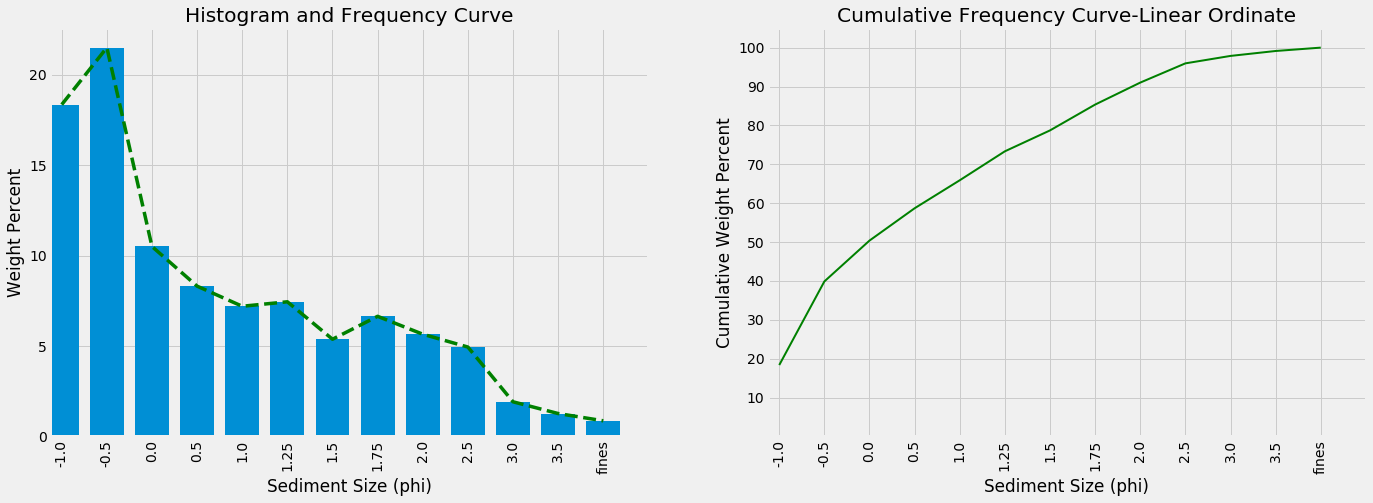

------------------------------------------------------------------------------------------


In [5]:
ssc.PLOTDualSampleWeightPercents()

## By default the Plot methods write their output to the computer screen. By setting the 
## PrintTo argument to 'file' a copy of the plot is printed to a PNG file and placed in
## the local directory. For example:

## ssc.PLOTDualSampleWeightPercents(printTo='file')

## note that Python is case sensitive.

#### Save results to a Comma-Separated Values (csv) text file:

In [ ]:
## saves the contents of the df_out dataframe to a csv file:
df_out.to_csv('./single_sample_results.csv')